#### Introduction


#### Our Metric
Our metric for this project was finding the neighborhood with comfortability. We define comfortability by the amount of fire incidents per neighborhood, length and height of public staircases, and number of condemned buildings. Neighborhoods that have many fire incidents, condemned buildings, and many sets of staircases tend to be harder and scarier to live in, so we wanted to find a neighborhood that anyone can live comfortably and peacefully in.

#### Condemned Buildings

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
cb = pd.read_csv("condemned_buildings.csv")

cb=cb[cb["address"].fillna('').str[-5:].str.isdigit()] #getting rid of invalid addresses
cb["address"] = cb["address"].str[-5:] #setting all remaining addresses to only record the zip code

#replacing empty score cells with a value 50 and changing any score cells with "Pass" to equal 0
cb["latest_inspection_score"]=cb["latest_inspection_score"].fillna(50)
cb["latest_inspection_score"]=cb["latest_inspection_score"].replace("Pass",0)

#getting the count and average inspection scores for each zip code, then merging them into one dataset
zipcode_condemned = cb.groupby(["address"]).size().reset_index(name="Condemned Buildings")
zipcode_avg_score = cb.groupby(["address"])["latest_inspection_score"].mean().reset_index(name="Avg Inspection Score")

zipcode_stats = pd.merge(zipcode_condemned, zipcode_avg_score, on="address")

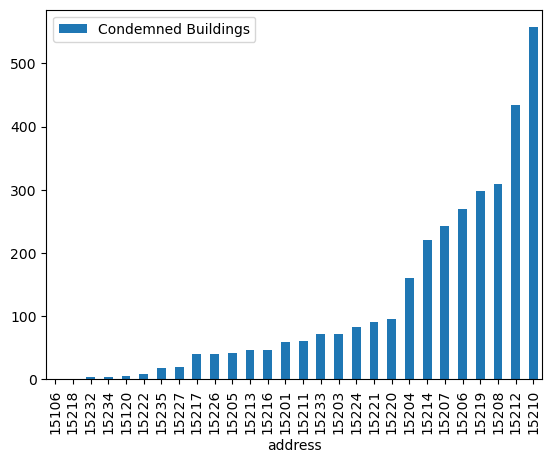

In [28]:
#creating a plot to show the number of condemned buildings per zip code in ascending order
sorted_count=zipcode_condemned.sort_values(by="Condemned Buildings",ascending=True)
sorted_count.plot(x="address",kind="bar")
plt.show()

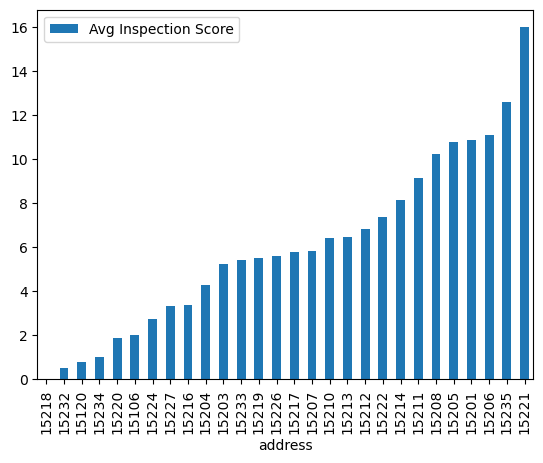

In [30]:
#creating a plot to show the average inspection score per zip code in ascending order
sorted_score = zipcode_avg_score.sort_values(by="Avg Inspection Score", ascending = True)
sorted_score.plot(x="address",kind="bar")
plt.show()

#### The Best Neighborhood
#### Highest Condemned Building and Inspection Scores
|Rank||Count||Score|
|:-|-|-:|-|:-|
|1.| 15210 (Mount Oliver)|557 |15221 (Wilkinsburg)| 16.00 |
|2.| 15212 (Perry South)| 434 |15235 (Penn Hills)| 12.61 |
|3.| 15208 (Homewood)|309 |15206 East Liberty)|11.11 |
|4.| 15219 (Central Business District)| 298 |15201 (Lawrenceville)|10.86 |
|5.| 15206 (East Liberty)| 270 | 15205 (Crafton)|10.78 |
|6.| 15207 (Hazelwood)|243 |15208 (Homewood)|10.23 |
|7.| 15214 (Perry North)|220 |15211 (Mount Washington)|9.17 |
|8.| 15204 (Sheraden)|161|15214 (Perry North)|8.16 |
|9.|15220 (Green Tree)|96|15222 (Downtown)|	7.38|       
|10.|15221 (Wilkinsburg)|91| 15212 (Perry South)|6.85|

#### Lowest Condemned Building and Inspection Scores	
|Rank| |Count| |Score|
|:-|-:|-:|-|:-|
|1.|15106 (Carnegie)|1|15218 (Swissvale)|0|
|2.|15218 (Swissvale) |1|15232 (Shadyside)|0.5|
|3.|15232 (Shadyside)|4|15120 (Homestead)|0.8|
|4.|15234 (Castle Shannon)|4|15234 (Castle Shannon)|1|
|5.|15120 (Homestead)|5|15220 (Green Tree)|1.9|
|6.|15222 (Downtown)|8|15106 (Carnegie)|2|
|7.|15235 (Penn Hills)|18|15224 (Bloomfield)|2.73|
|8.|15227 (Brentwood)|19|15227 (Brentwood)|3.32|
|9.|15217 (Squirrel Hill South)|40|15216 (Dormont)|3.39|
|10.|15226 (Brookline)|40|15204 (Sheraden)|4.27|

From the data, we see that Carnegie and Swissvale have the lowest amount of condemned buildings, while Swissvale and Shadyside have the lowest average inspection scores. Seeing how Swissvale wins in both categories, it is the best neighborhood in terms of number of condemned buildings. 

#### Our Favorite Neighborhood
**Jack** - My favorite neighborhood in Pittsburgh is Bloomfield because it has a bunch of cool stores. 

**RJ** - My favorite neighborhoods are Millvale (my hometown) and Squirrel Hill for all the great restaurants and shops
